<a href="https://colab.research.google.com/github/satishgc227/git-test/blob/master/OTTO_RECOMMENDER_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task overview :
The aim of this competition is to predict e-commerce clicks, cart additions, and orders. You'll build a multi-objective recommender system based on previous events in a user session.

Current recommender systems consist of various models with different approaches, ranging from simple matrix factorization to a transformer-type deep neural network. However, no single model exists that can simultaneously optimize multiple objectives. In this competition, you’ll build a single entry to predict click-through, add-to-cart, and conversion rates based on previous same-session events.

Import libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

In [ ]:
#!pip install zipfile36

In [ ]:
# if sys.version_info >= (3, 6):
#     import zipfile
# else:
#     import zipfile36 as zipfile


# file_name="otto-recommender-system.zip"

In [ ]:
# # opening the zip file in READ mode
# with zipfile(file_name, 'r') as zip:
#     # printing all the contents of the zip file
#     zip.printdir()
  
#     # extracting all the files
#     print('Extracting all the files now...')
#     zip.extractall()
#     print('Done!')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [63]:
df=pd.read_csv("/content/traian csv.csv")

In [64]:
df

,session,aid,ts,type
0,8000000,766953,1.660420e+12,clicks
1,8000000,1586093,1.660420e+12,clicks
2,8000000,1586093,1.660420e+12,clicks
3,8000000,682970,1.660420e+12,clicks
4,8000000,799794,1.660420e+12,clicks
...,...,...,...,...
1048570,8089703,911487,1.660460e+12,clicks
1048571,8089703,911487,1.660460e+12,carts
1048572,8089703,413885,1.660460e+12,clicks
1048573,8089703,911487,1.660460e+12,clicks


Data preprocessing:

In [65]:
df.isnull().sum()

session    0
aid        0
ts         0
type       0
dtype: int64

In [66]:
df.dropna()

,session,aid,ts,type
0,8000000,766953,1.660420e+12,clicks
1,8000000,1586093,1.660420e+12,clicks
2,8000000,1586093,1.660420e+12,clicks
3,8000000,682970,1.660420e+12,clicks
4,8000000,799794,1.660420e+12,clicks
...,...,...,...,...
1048570,8089703,911487,1.660460e+12,clicks
1048571,8089703,911487,1.660460e+12,carts
1048572,8089703,413885,1.660460e+12,clicks
1048573,8089703,911487,1.660460e+12,clicks


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   session  1048575 non-null  int64  
 1   aid      1048575 non-null  int64  
 2   ts       1048575 non-null  float64
 3   type     1048575 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 32.0+ MB


In [68]:
# import json
# f=open("/content/test.jsonl")
# chunks=f.read()
# chunks

In [69]:
#print(chunks)

In [70]:
# import pandas as pd
# import json
# import glob
# from pandas.io.json import json_normalize

# json_files = glob.glob("*.json")
# dfs = []
# for file in json_files:
#     with open("/content/test.jsonl") as f:
#         for line in f.readlines():
#             df = pd.json_normalize(json.loads(line))
#             list_= ['','Item.metadata.M.timestamp.S','Item.sensor.M.celcius.N','Item.sensor.M.water.N']
#             df = df.loc[:, df.columns.isin(list_)]
#             dfs.append(df)
# df_combine = pd.concat(dfs, sort=False)
# df_combine.to_csv('json_to_raw.csv',index= None)

In [71]:
# import zipfile
# from google.colab import drive

# drive.mount('/content/drive/')

# zip_ref = zipfile.ZipFile("/content/drive/Othercomputers/My Laptop/Downloads/train.jsonl.zip", 'r')
# zip_ref.extractall("/content/drive/Othercomputers/My Laptop/Downloads/tmp")
# zip_ref.close()

In [72]:
# import json
# dd=open("/content/drive/Othercomputers/My Laptop/Downloads/tmp/train.jsonl")

In [73]:
# import pandas as pd
# chunks=pd.read_json(dd,lines=True, chunksize=1000)

In [74]:
#fg=pd.DataFrame(chunks)

In [75]:
df.shape

(1048575, 4)

In [76]:
df['session'].unique()


array([8000000, 8000001, 8000002, ..., 8089701, 8089702, 8089703])

In [77]:
df.session.unique().shape

(89704,)

In [78]:
s=df.groupby('session')['aid','ts','type'].count()
print(s)

         aid   ts  type
session                
8000000    6    6     6
8000001    2    2     2
8000002    7    7     7
8000003    5    5     5
8000004  151  151   151
...      ...  ...   ...
8089699    9    9     9
8089700    2    2     2
8089701    7    7     7
8089702    4    4     4
8089703   13   13    13

[89704 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [79]:
df.ts

0          1.660420e+12
1          1.660420e+12
2          1.660420e+12
3          1.660420e+12
4          1.660420e+12
               ...     
1048570    1.660460e+12
1048571    1.660460e+12
1048572    1.660460e+12
1048573    1.660460e+12
1048574    1.660460e+12
Name: ts, Length: 1048575, dtype: float64

In [80]:
import datetime
d=df['ts'].max()
f=df['ts'].min()
f

1660420000000.0

In [81]:
datetime.datetime.fromtimestamp(f/1000),datetime.datetime.fromtimestamp(d/1000)

(datetime.datetime(2022, 8, 13, 19, 46, 40),
 datetime.datetime(2022, 8, 28, 20, 53, 20))

In [82]:
df['ts'].values

array([1.66042e+12, 1.66042e+12, 1.66042e+12, ..., 1.66046e+12,
       1.66046e+12, 1.66046e+12])

In [83]:
df['ts'].values[0]

1660420000000.0

In [84]:
session_duration = df.groupby('session').apply(lambda x: (x['ts'].values[-1] - x['ts'].values[0])/(1000*60*60))
session_duration.max()

361.1111111111111

Let's convert timestamp to the readable time:

In [85]:
df['ts']=pd.to_datetime(df['ts'])

In [86]:
b=df['ts']

In [87]:
print(f'Years:{b.dt.year.unique()} , \n Months"{b.dt.month.unique()}, \n Days:{b.dt.day.unique()} ')

Years:[1970] , 
 Months"[1], 
 Days:[1] 


In [88]:
df['ts_conv']=b


In [89]:
df_grouped= df.groupby('session')['ts_conv'].agg([min,max])

In [90]:
df_grouped['diff']=df_grouped['max']-df_grouped['min']

In [91]:
df_grouped['diff']

session
8000000          0 days 00:00:00
8000001   0 days 00:00:00.680000
8000002          0 days 00:00:00
8000003   0 days 00:00:00.950000
8000004   0 days 00:00:01.290000
                   ...          
8089699          0 days 00:00:00
8089700          0 days 00:00:00
8089701          0 days 00:00:00
8089702          0 days 00:00:00
8089703          0 days 00:00:00
Name: diff, Length: 89704, dtype: timedelta64[ns]

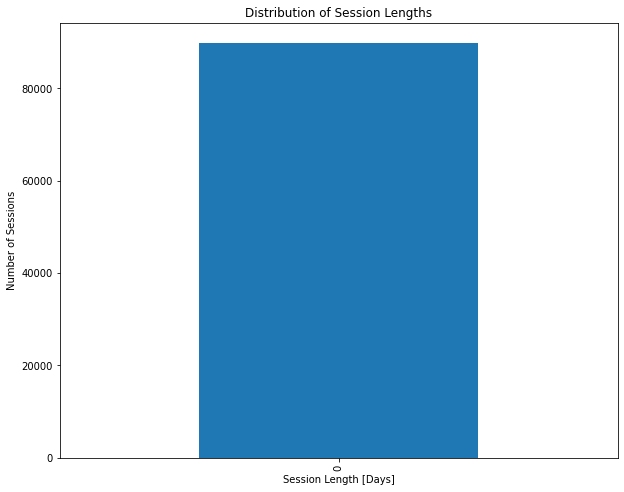

In [102]:
df_grouped['diff'].dt.days.sort_values().value_counts().plot(kind='bar', figsize=(10,8), title='Distribution of Session Lengths')
plt.xlabel('Session Length [Days]')
plt.ylabel('Number of Sessions')
plt.show()

In [108]:
ind_0=df_grouped.query('diff.dt.days==0').index.to_list()

In [115]:
# ind_0

In [ ]:
import matplotlib.pyplot as plt

axs=plt.subplots(3,1)

df.groupby('session').size().plot.hist()


In [ ]:
colors = ['tab:olive', 'tab:orange', 'tab:red']

df.groupby('session').type.value_counts().plot(kind='bar', color=colors)